<a href="https://colab.research.google.com/github/avivbach/ML_FirstAssignment/blob/main/team_rocket_(13).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Dolfin Varshev - 315853101**
* A link to my kaggle profile: https://www.kaggle.com/dolfinvarshev

#**Aviv Bachana - 211335286**
* A link to my kaggle profile: https://www.kaggle.com/avivbach

In [1]:
#Competition link
competition_url = "https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques"
print(f"Kaggle Competition: {competition_url}")



Kaggle Competition: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques


#**House Prices Prediction - Advanced Regression Techniques**

## Overview

In this notebook, we aim to predict house prices in Ames, Iowa, using the "House Prices - Advanced Regression Techniques" dataset provided by Kaggle. Our primary goal is to build a reliable and accurate predictive model utilizing Linear Regression techniques. To achieve this, we will:


The competition is about developing a model that can predict the sales price.
The goal is to get the model as accurate as we can.
We are going to use Linear Regresssion and SGD for the models.
The loss functions that we will use are R^2 (becuase it is easy to see values between 1-0) and RMSE.
For data handeling we will normlize with StandardScaler and for the strings we will use OneHotEncoder.
For visualization and data handeling we will use matplotlib, seaborn, numpy and pandas.

Throughout this notebook, visualizations and detailed explanations will be provided to clearly communicate our methodology, findings, and insights gained from the analysis. Our final goal is not only achieving a strong predictive performance but also ensuring clarity and reproducibility of the entire analytical process.

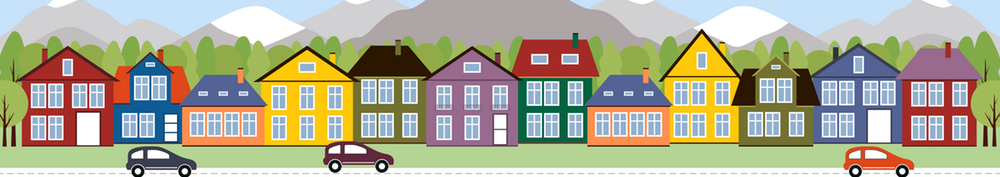

#**Imports and Definitions**

In [8]:
import math
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))


# from google.colab import files
# files.upload()


# Define my custom color palette
my_palette = [
 # Blues
    (0.5, 0.7, 0.9),  # Pastel blue
    (0.6, 0.8, 0.9),  # Light pastel blue
    (0.4, 0.6, 0.8),  # Deep pastel blue
    (0.7, 0.85, 0.95),  # Sky pastel blue
    (0.3, 0.5, 0.7),   # Cool pastel blue
    (0.55, 0.75, 0.85),  # Cloudy pastel blue
    (0.45, 0.65, 0.85),  # Ocean pastel blue
    (0.38, 0.58, 0.78),  # Subtle pastel blue
    (0.48, 0.68, 0.88),  # Misty pastel blue
    (0.6, 0.78, 0.92),  # Calm pastel blue
    (0.5, 0.73, 0.85) , # Soft sky pastel blue


#Purples =
    (0.8, 0.6, 0.9),  # Pastel purple
    (0.7, 0.5, 0.8),  # Light pastel purple
    (0.9, 0.7, 1.0),  # Soft lavender
    (0.85, 0.65, 0.95),  # Subtle pastel purple
    (0.75, 0.55, 0.85),  # Dreamy pastel purple
    (0.92, 0.72, 0.98),  # Lilac pastel purple
    (0.78, 0.58, 0.88),  # Light orchid purple
    (0.82, 0.62, 0.92),  # Lavender blush pastel purple
    (0.88, 0.68, 0.96),  # Light violet pastel purple
    (0.83, 0.63, 0.9),  # Soft amethyst pastel purple
    (0.9, 0.75, 0.97),   # Blooming pastel purple

#Pinks
    (224/255, 31/255, 137/255),  # Vibrant pink
    (231/255, 72/255, 161/255),  # Medium pink
    (243/255, 165/255, 208/255),  # Light pink
    (1.0, 0.8, 0.9),  # Cotton candy pink
    (0.95, 0.7, 0.85),  # Blush pink
    (0.98, 0.75, 0.88),  # Rose quartz pastel pink
    (0.96, 0.68, 0.8),  # Soft coral pastel pink
    (0.94, 0.6, 0.75),  # Pastel bubblegum pink
    (0.97, 0.77, 0.87),  # Sakura pastel pink
    (0.92, 0.65, 0.8),  # Light raspberry pastel pink
    (0.89, 0.58, 0.72),   # Dusky pastel pink

    # haneul
    (0.482, 0.427, 0.553),
    (0.663, 0.608, 0.737),
    (0.89, 0.843, 0.949),
    (0.322, 0.271, 0.427),
    (0.62, 0.533, 0.78),

    # HaneulPink
    (0.988, 0.831, 0.761),
    (1.0, 0.808, 0.749),
    (0.98, 0.874, 0.843),
    (0.988, 0.718, 0.718),
    (0.961, 0.804, 0.835),

    # inspo #5
    (0.451, 0.549, 0.408),
    (0.561, 0.671, 0.514),
    (0.667, 0.82, 0.6),
    (0.788, 0.953, 0.718),
    (0.898, 1.0, 0.851)
]


# define plt settingstitle_fontsize
sns.set_theme()
plt.rcParams["font.size"] = 20
plt.rcParams["axes.labelsize"] = 12
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams["legend.fontsize"] = 20
plt.rcParams["legend.markerscale"] = 1.5
plt.rcParams["figure.figsize"] = (20, 10)
plt.rcParams["axes.titlesize"] = 20
plt.rcParams["axes.titleweight"] = "bold"
plt.rcParams["image.cmap"] = "PuBu"
sns.set(style="whitegrid", palette=my_palette)

pd.set_option('display.max_columns', None)


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**For the Grader - If needed**

In [9]:
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# !pip install -q kaggle


#**Reading the data from the files**

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [10]:
# Load the train and test datasets
# Load the train and test datasets
test_path ='test.csv'
train_path = 'train.csv'


train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

### 📘 Data Dictionary

| Feature       | Description              | Values (examples)                               |
|:--------------|:-------------------------|:------------------------------------------------|
| MSSubClass    | Dwelling type            | 20:1-story newer, 30:older, 60:2-story, 120:PUD |
| MSZoning      | Zoning class             | RL, RM, C, FV, I                                |
| LotFrontage   | Street frontage          | Numeric (ft)                                    |
| LotArea       | Lot size                 | Numeric (sq ft)                                 |
| Street        | Road access              | Pave, Grvl                                      |
| Alley         | Alley access             | Pave, Grvl, NA                                  |
| LotShape      | Shape of lot             | Reg, IR1, IR2, IR3                              |
| LandContour   | Flatness                 | Lvl, Bnk, HLS, Low                              |
| Utilities     | Available utilities      | AllPub, NoSeWa, ELO                             |
| LotConfig     | Lot configuration        | Inside, Corner, CulDSac, FR2, FR3               |
| LandSlope     | Slope of lot             | Gtl, Mod, Sev                                   |
| Neighborhood  | Physical location        | OldTown, CollgCr, StoneBr, etc.                 |
| Condition1    | Proximity to features    | Norm, Artery, Feedr, RRAn, PosN                 |
| BldgType      | Type of dwelling         | 1Fam, Duplx, TwnhsE, etc.                       |
| HouseStyle    | Dwelling style           | 1Story, 2Story, SFoyer, SLvl                    |
| OverallQual   | Overall material quality | 1–10                                            |
| OverallCond   | Overall condition        | 1–10                                            |
| YearBuilt     | Year built               | Numeric (year)                                  |
| YearRemodAdd  | Remodel year             | Numeric (year)                                  |
| RoofStyle     | Roof type                | Gable, Hip, Flat, etc.                          |
| RoofMatl      | Roof material            | CompShg, Metal, WdShngl, etc.                   |
| Exterior1st   | Primary exterior         | VinylSd, HdBoard, BrkFace, etc.                 |
| Exterior2nd   | Secondary exterior       | Same as Exterior1st                             |
| MasVnrType    | Masonry veneer type      | BrkFace, Stone, None                            |
| MasVnrArea    | Masonry area             | Numeric (sq ft)                                 |
| ExterQual     | Exterior quality         | Ex, Gd, TA, Fa, Po                              |
| ExterCond     | Exterior condition       | Ex, Gd, TA, Fa, Po                              |
| Foundation    | Foundation type          | PConc, CBlock, Slab, etc.                       |
| BsmtQual      | Basement height          | Ex, Gd, TA, Fa, Po, NA                          |
| BsmtFinSF1    | Finished basement SF     | Numeric                                         |
| Heating       | Heating type             | GasA, GasW, Grav, etc.                          |
| CentralAir    | Central air              | Y, N                                            |
| GrLivArea     | Above-ground living area | Numeric (sq ft)                                 |
| FullBath      | Full baths above grade   | Numeric                                         |
| KitchenQual   | Kitchen quality          | Ex, Gd, TA, Fa, Po                              |
| GarageType    | Garage location          | Attchd, Detchd, BuiltIn, etc.                   |
| GarageCars    | Garage capacity          | Numeric (cars)                                  |
| GarageArea    | Garage area              | Numeric (sq ft)                                 |
| PavedDrive    | Driveway paved           | Y, P, N                                         |
| SaleType      | Type of sale             | WD, New, COD, Con, etc.                         |
| SaleCondition | Sale condition           | Normal, Abnorml, Family, etc.                   |


#**Processing the data**

#### Visualize columns with missing values
This is another method to examine columns with missing values — using a more visual approach.  
It provides a combined table showing:
- The number of missing values per feature
- The percentage they represent out of the total dataset
- A barplot that highlights the columns that require attention

This visualization makes it easier to identify problematic features and decide on appropriate handling strategies.


Column  Null_Count_train  Null_Count_test    %_train     %_test
0         PoolQC              1453             1456  99.520548  99.794380
1    MiscFeature              1406             1408  96.301370  96.504455
2          Alley              1369             1352  93.767123  92.666210
3          Fence              1179             1169  80.753425  80.123372
4     MasVnrType               872              894  59.726027  61.274846
5    FireplaceQu               690              730  47.260274  50.034270
6    LotFrontage               259              227  17.739726  15.558602
7   GarageFinish                81               78   5.547945   5.346127
8     GarageCond                81               78   5.547945   5.346127
9    GarageYrBlt                81               78   5.547945   5.346127
10    GarageQual                81               78   5.547945   5.346127
11    GarageType                81               76   5.547945   5.209047
12      BsmtCond                37               45   2.534247   3.084304
13  BsmtExposure                38               44   2.602740   3.015764
14      BsmtQual                37               44   2.534247   3.015764
15  BsmtFinType2                38               42   2.602740   2.878684
16  BsmtFinType1                37               42   2.534247   2.878684
17    MasVnrArea                 8               15   0.547945   1.028101
18      MSZoning                 0                4   0.000000   0.274160
19  BsmtFullBath                 0                2   0.000000   0.137080
20  BsmtHalfBath                 0                2   0.000000   0.137080
21     Utilities                 0                2   0.000000   0.137080
22    Functional                 0                2   0.000000   0.137080
23     BsmtUnfSF                 0                1   0.000000   0.068540
24    BsmtFinSF2                 0                1   0.000000   0.068540
25    BsmtFinSF1                 0                1   0.000000   0.068540
26   KitchenQual                 0                1   0.000000   0.068540
27    GarageArea                 0                1   0.000000   0.068540
28   Exterior2nd                 0                1   0.000000   0.068540
29   Exterior1st                 0                1   0.000000   0.068540
30      SaleType                 0                1   0.000000   0.068540
31    GarageCars                 0                1   0.000000   0.068540
32   TotalBsmtSF                 0                1   0.000000   0.068540
33    Electrical                 1                0   0.068493   0.000000

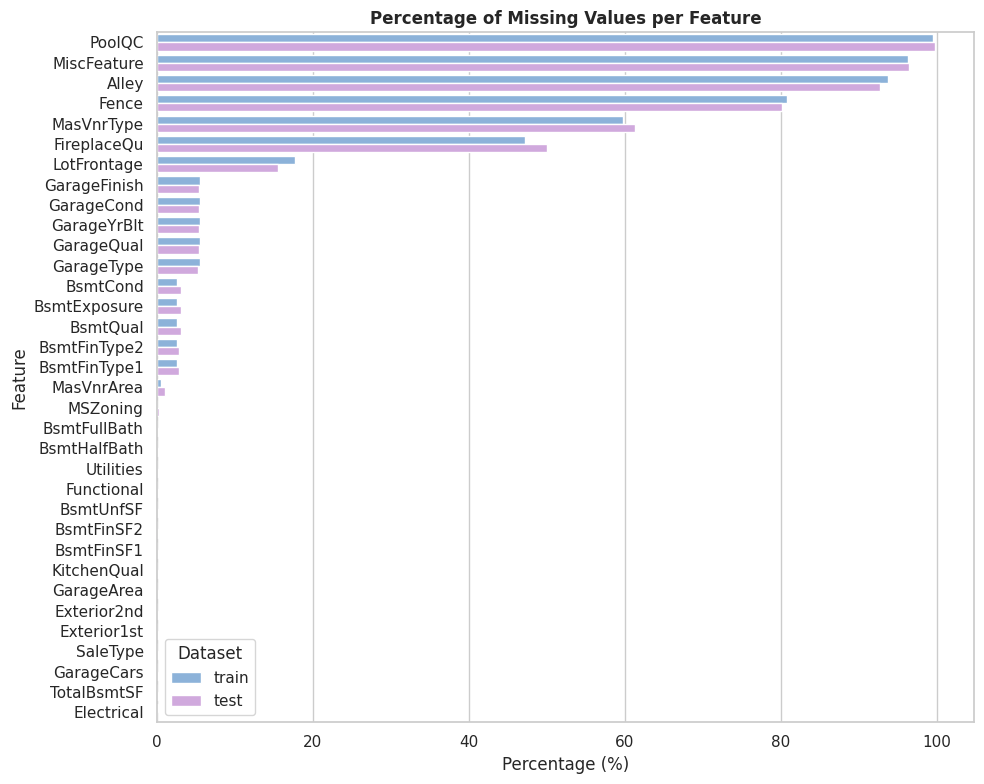

In [11]:

def analyze_missing_values(train_df, test_df, palette=None):
    """
    Displays and plots missing value statistics (counts and percentages)
    for training and testing datasets.

    Parameters:
    - train_df: pandas DataFrame for training data
    - test_df: pandas DataFrame for testing data
    - palette: optional color palette for barplots (list of 2 colors)
    """
    # Use default palette if none provided
    if palette is None:
        palette = sns.color_palette("Set2")[:2]

    # Step 1: Count missing values
    train_nulls = train_df.isnull().sum()
    test_nulls = test_df.isnull().sum()

    # Step 2: Create DataFrames with missing columns only
    train_nulls_df = train_nulls[train_nulls > 0].reset_index()
    train_nulls_df.columns = ['Column', 'Null_Count_train']

    test_nulls_df = test_nulls[test_nulls > 0].reset_index()
    test_nulls_df.columns = ['Column', 'Null_Count_test']

    # Step 3: Merge train and test missing info
    combined_nulls_df = pd.merge(train_nulls_df, test_nulls_df, on='Column', how='outer').fillna(0)
    combined_nulls_df[['Null_Count_train', 'Null_Count_test']] = combined_nulls_df[['Null_Count_train', 'Null_Count_test']].astype(int)

    # Step 4: Add % columns
    combined_nulls_df['%_train'] = combined_nulls_df['Null_Count_train'] / len(train_df) * 100
    combined_nulls_df['%_test'] = combined_nulls_df['Null_Count_test'] / len(test_df) * 100

    # Step 5: Sort by test % (can change to train or total)
    combined_nulls_df = combined_nulls_df.sort_values(by='%_test', ascending=False).reset_index(drop=True)

    # Step 6: Display the final summary table
    display(combined_nulls_df)


    # Step 8: Barplot — Missing Value Percentages
    df_percent = combined_nulls_df.melt(
        id_vars='Column',
        value_vars=['%_train', '%_test'],
        var_name='Dataset',
        value_name='Missing Percentage'
    )
    df_percent['Dataset'] = df_percent['Dataset'].str.replace('%_', '')

    plt.figure(figsize=(10, 8))
    sns.barplot(data=df_percent, y='Column', x='Missing Percentage', hue='Dataset', palette=palette)
    plt.title('Percentage of Missing Values per Feature')
    plt.xlabel('Percentage (%)')
    plt.ylabel('Feature')
    plt.legend(title='Dataset')
    plt.tight_layout()
    plt.show()

analyze_missing_values(train_data, test_data, palette=[my_palette[0], my_palette[20]])


As we can see, 33 columns out of the 81 have nulls and some of them are mostly nulls.

Now we will get raid of columns that are mostly nulls and will handle the rest of the columns with the median for numbers and mode for objects.

In [12]:
# The Id doesnt give us any value so we will remove it
train_data = train_data.drop('Id', axis=1)
train_data.reset_index(drop=True, inplace=True)

#**Deciding How to Handle Missing Values**

After visualizing the percentage of missing values in both the train and test datasets, we now need to decide how to handle them.

There are generally three main approaches to handling missing values in a dataset:

1. **Row removal**:  
ֿ   Drop only the rows where values are missing.
   This is effective when the number of missing rows is very small and won’t significantly affect the dataset.
   it's controversial thing to do, because of that and with our current knowledge we won't do it.

2. **Column removal**:  
   Drop entire features (columns) that contain too many missing values or are unlikely to be informative.  
   This is a reasonable option when a column is missing a large portion of its data (e.g., over 20%-30%).

3. **Imputation (filling in missing values) - We Didn't Learn In Class**:  
   Fill in missing values using strategies such as the column’s mean, median, mode, or using model-based techniques.  
   Although we didn't learn it, we discovered it is preferred by many people in real-world data science workflows.

---

For those reasons, in our analysis, we will **only consider methods 2 and 3** as valid techniques.

This approach will help us maintain a clean and reliable dataset, even with our current limited toolbox.

---

In [13]:
# Define a threshold for null values
null_threshold = 0.2

# Calculate the percentage of nulls in each column
train_null_percent = train_data.isnull().mean()
test_null_percent = test_data.isnull().mean()

# Drop columns with more than 20% null values
columns_to_drop_train = train_null_percent[train_null_percent > null_threshold].index
columns_to_drop_test = test_null_percent[test_null_percent > null_threshold].index

print(columns_to_drop_test)
print(columns_to_drop_train)

train_data_cleaned = train_data.drop(columns=columns_to_drop_train)
test_data_cleaned = test_data.drop(columns=columns_to_drop_test)

train_data_cleaned.info

Index(['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')
Index(['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')


<bound method DataFrame.info of       MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0             60       RL         65.0     8450   Pave      Reg         Lvl   
1             20       RL         80.0     9600   Pave      Reg         Lvl   
2             60       RL         68.0    11250   Pave      IR1         Lvl   
3             70       RL         60.0     9550   Pave      IR1         Lvl   
4             60       RL         84.0    14260   Pave      IR1         Lvl   
...          ...      ...          ...      ...    ...      ...         ...   
1455          60       RL         62.0     7917   Pave      Reg         Lvl   
1456          20       RL         85.0    13175   Pave      Reg         Lvl   
1457          70       RL         66.0     9042   Pave      Reg         Lvl   
1458          20       RL         68.0     9717   Pave      Reg         Lvl   
1459          20       RL         75.0     9937   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope Neighborhood Condition1 Condition2  \
0       AllPub    Inside       Gtl      CollgCr       Norm       Norm   
1       AllPub       FR2       Gtl      Veenker      Feedr       Norm   
2       AllPub    Inside       Gtl      CollgCr       Norm       Norm   
3       AllPub    Corner       Gtl      Crawfor       Norm       Norm   
4       AllPub       FR2       Gtl      NoRidge       Norm       Norm   
...        ...       ...       ...          ...        ...        ...   
1455    AllPub    Inside       Gtl      Gilbert       Norm       Norm   
1456    AllPub    Inside       Gtl       NWAmes       Norm       Norm   
1457    AllPub    Inside       Gtl      Crawfor       Norm       Norm   
1458    AllPub    Inside       Gtl        NAmes       Norm       Norm   
1459    AllPub    Inside       Gtl      Edwards       Norm       Norm   

     BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0        1Fam     2Story            7            5       2003          2003   
1        1Fam     1Story            6            8       1976          1976   
2        1Fam     2Story            7            5       2001          2002   
3        1Fam     2Story            7            5       1915          1970   
4        1Fam     2Story            8            5       2000          2000   
...       ...        ...          ...          ...        ...           ...   
1455     1Fam     2Story            6            5       1999          2000   
1456     1Fam     1Story            6            6       1978          1988   
1457     1Fam     2Story            7            9       1941          2006   
1458     1Fam     1Story            5            6       1950          1996   
1459     1Fam     1Story            5            6       1965          1965   

     RoofStyle RoofMatl Exterior1st Exterior2nd  MasVnrArea ExterQual  \
0        Gable  CompShg     VinylSd     VinylSd       196.0        Gd   
1        Gable  CompShg     MetalSd     MetalSd         0.0        TA   
2        Gable  CompShg     VinylSd     VinylSd       162.0        Gd   
3        Gable  CompShg     Wd Sdng     Wd Shng         0.0        TA   
4        Gable  CompShg     VinylSd     VinylSd       350.0        Gd   
...        ...      ...         ...         ...         ...       ...   
1455     Gable  CompShg     VinylSd     VinylSd         0.0        TA   
1456     Gable  CompShg     Plywood     Plywood       119.0        TA   
1457     Gable  CompShg     CemntBd     CmentBd         0.0        Ex   
1458       Hip  CompShg     MetalSd     MetalSd         0.0        TA   
1459     Gable  CompShg     HdBoard     HdBoard         0.0        Gd   

     ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0           TA      PConc       Gd       TA           No          GLQ   
1           TA     CBlock       Gd       TA           Gd          ALQ   
2           TA      PConc       Gd       TA           Mn          GLQ   
3           TA     BrkTi

In [14]:
# Handle remaining missing values
for df in [train_data_cleaned, test_data_cleaned]:
    # Replace nulls in numeric columns with the median
    numeric_cols = df.select_dtypes(include=['number']).columns
    df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

    # Replace nulls in categorical columns with the mode
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        df[col] = df[col].fillna(df[col].mode()[0])

# Display information about the cleaned datasets
train_data_cleaned_info = train_data_cleaned.info()
test_data_cleaned_info = test_data_cleaned.info()

(train_data_cleaned_info, test_data_cleaned_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

(None, None)

Now we are left with 74 columns in the train and 73 in the test and we can start looking into the data

# **Regplot**
 - Non-linear patterns that Pearson correlation wouldn't capture
- Outliers that could violate assumptions of homoscedasticity (constant variance)
- Linearity, which is required by Linear Regression

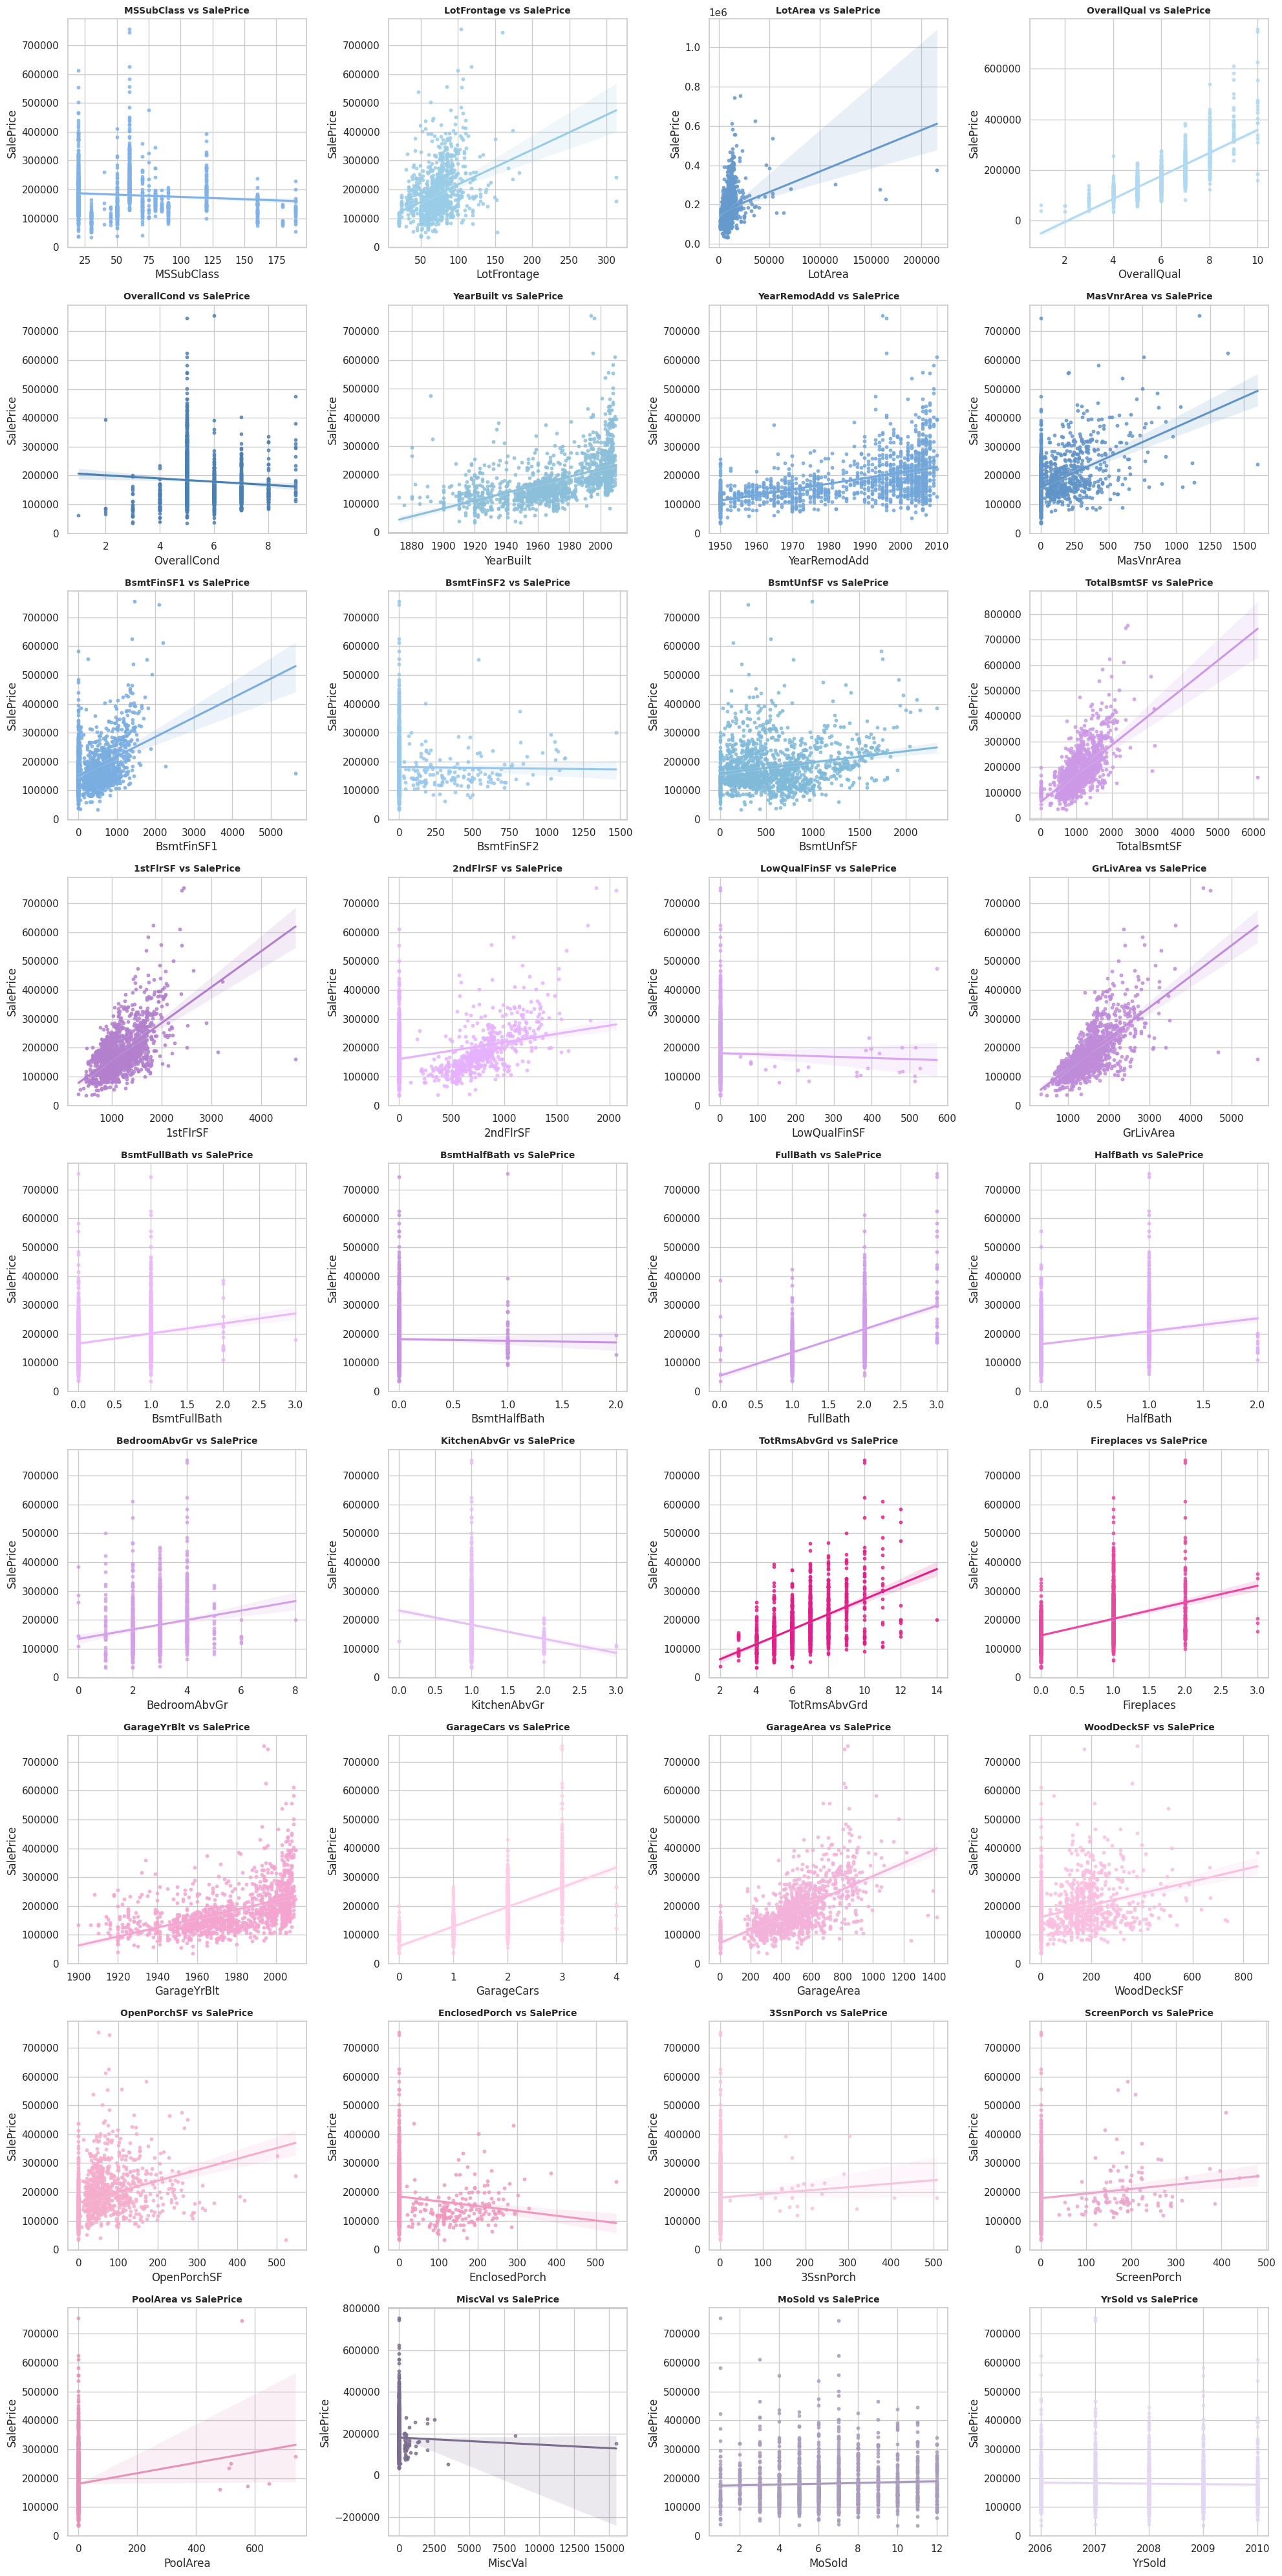

In [15]:
# Filter only numeric columns from the training data
numeric_columns = train_data.select_dtypes(include=['number'])

# Generate regplots for all numeric features against SalePrice
numeric_columns_without_target = numeric_columns.drop(columns=['SalePrice'])


def plot_reg_target_values_by_selected_features(df, target_column, palette):
    n = len(df.columns)
    ncols=4
    # nrows = math.ceil(math.sqrt(n))
    nrows = math.ceil(n / ncols)

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 40))
    axes = axes.flatten()

    for i, feature in enumerate(df.columns):
        sns.regplot(
            x=feature, y=target_column, data=numeric_columns,
            color=palette[i], ax=axes[i], scatter_kws={"s": 10}
        )
        axes[i].set_title(f'{feature} vs {target_column}', fontsize=10)

    # Remove extra axes
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Usage
plot_reg_target_values_by_selected_features(numeric_columns_without_target, 'SalePrice', my_palette)

#**Bar Plot**
In order to decide which features are suitable for a linear regression model, we need to understand how their values are distributed across the dataset.  
To do this effectively, we chose to use **count-based histograms**.

This visualization method provides several key benefits:

- **Relative Frequency View**: It helps us compare how dominant certain values are.
- **Identify Sparse or Zero-Heavy Features**: Columns where 90–100% of the values are zero become immediately visible. Such features are poor candidates for linear models unless transformed properly.
- **Categorical Behavior**: Features that behave like categorical variables (e.g., only values 0, 1, 2) do not fit the best for linear regression model.
- **Outlier Sensitivity**: Skewed features or long-tailed distributions are easier to detect visually than with `.describe()` or statistical summaries alone.
- **Supports Consistent Filtering**: Using these plots, we can consistently justify which features should be:
  - **Kept** and scaled (continuous features with meaningful spread),
  - **Dropped** (features with no variance or not suitable for scaling),
  - Or transformed in future iterations (e.g., via log or binarization).

Overall, this visualization allowed us to make **data-driven, visually-supported decisions** about which features contribute meaningful information to the model and which should be removed to prevent noise or bias.

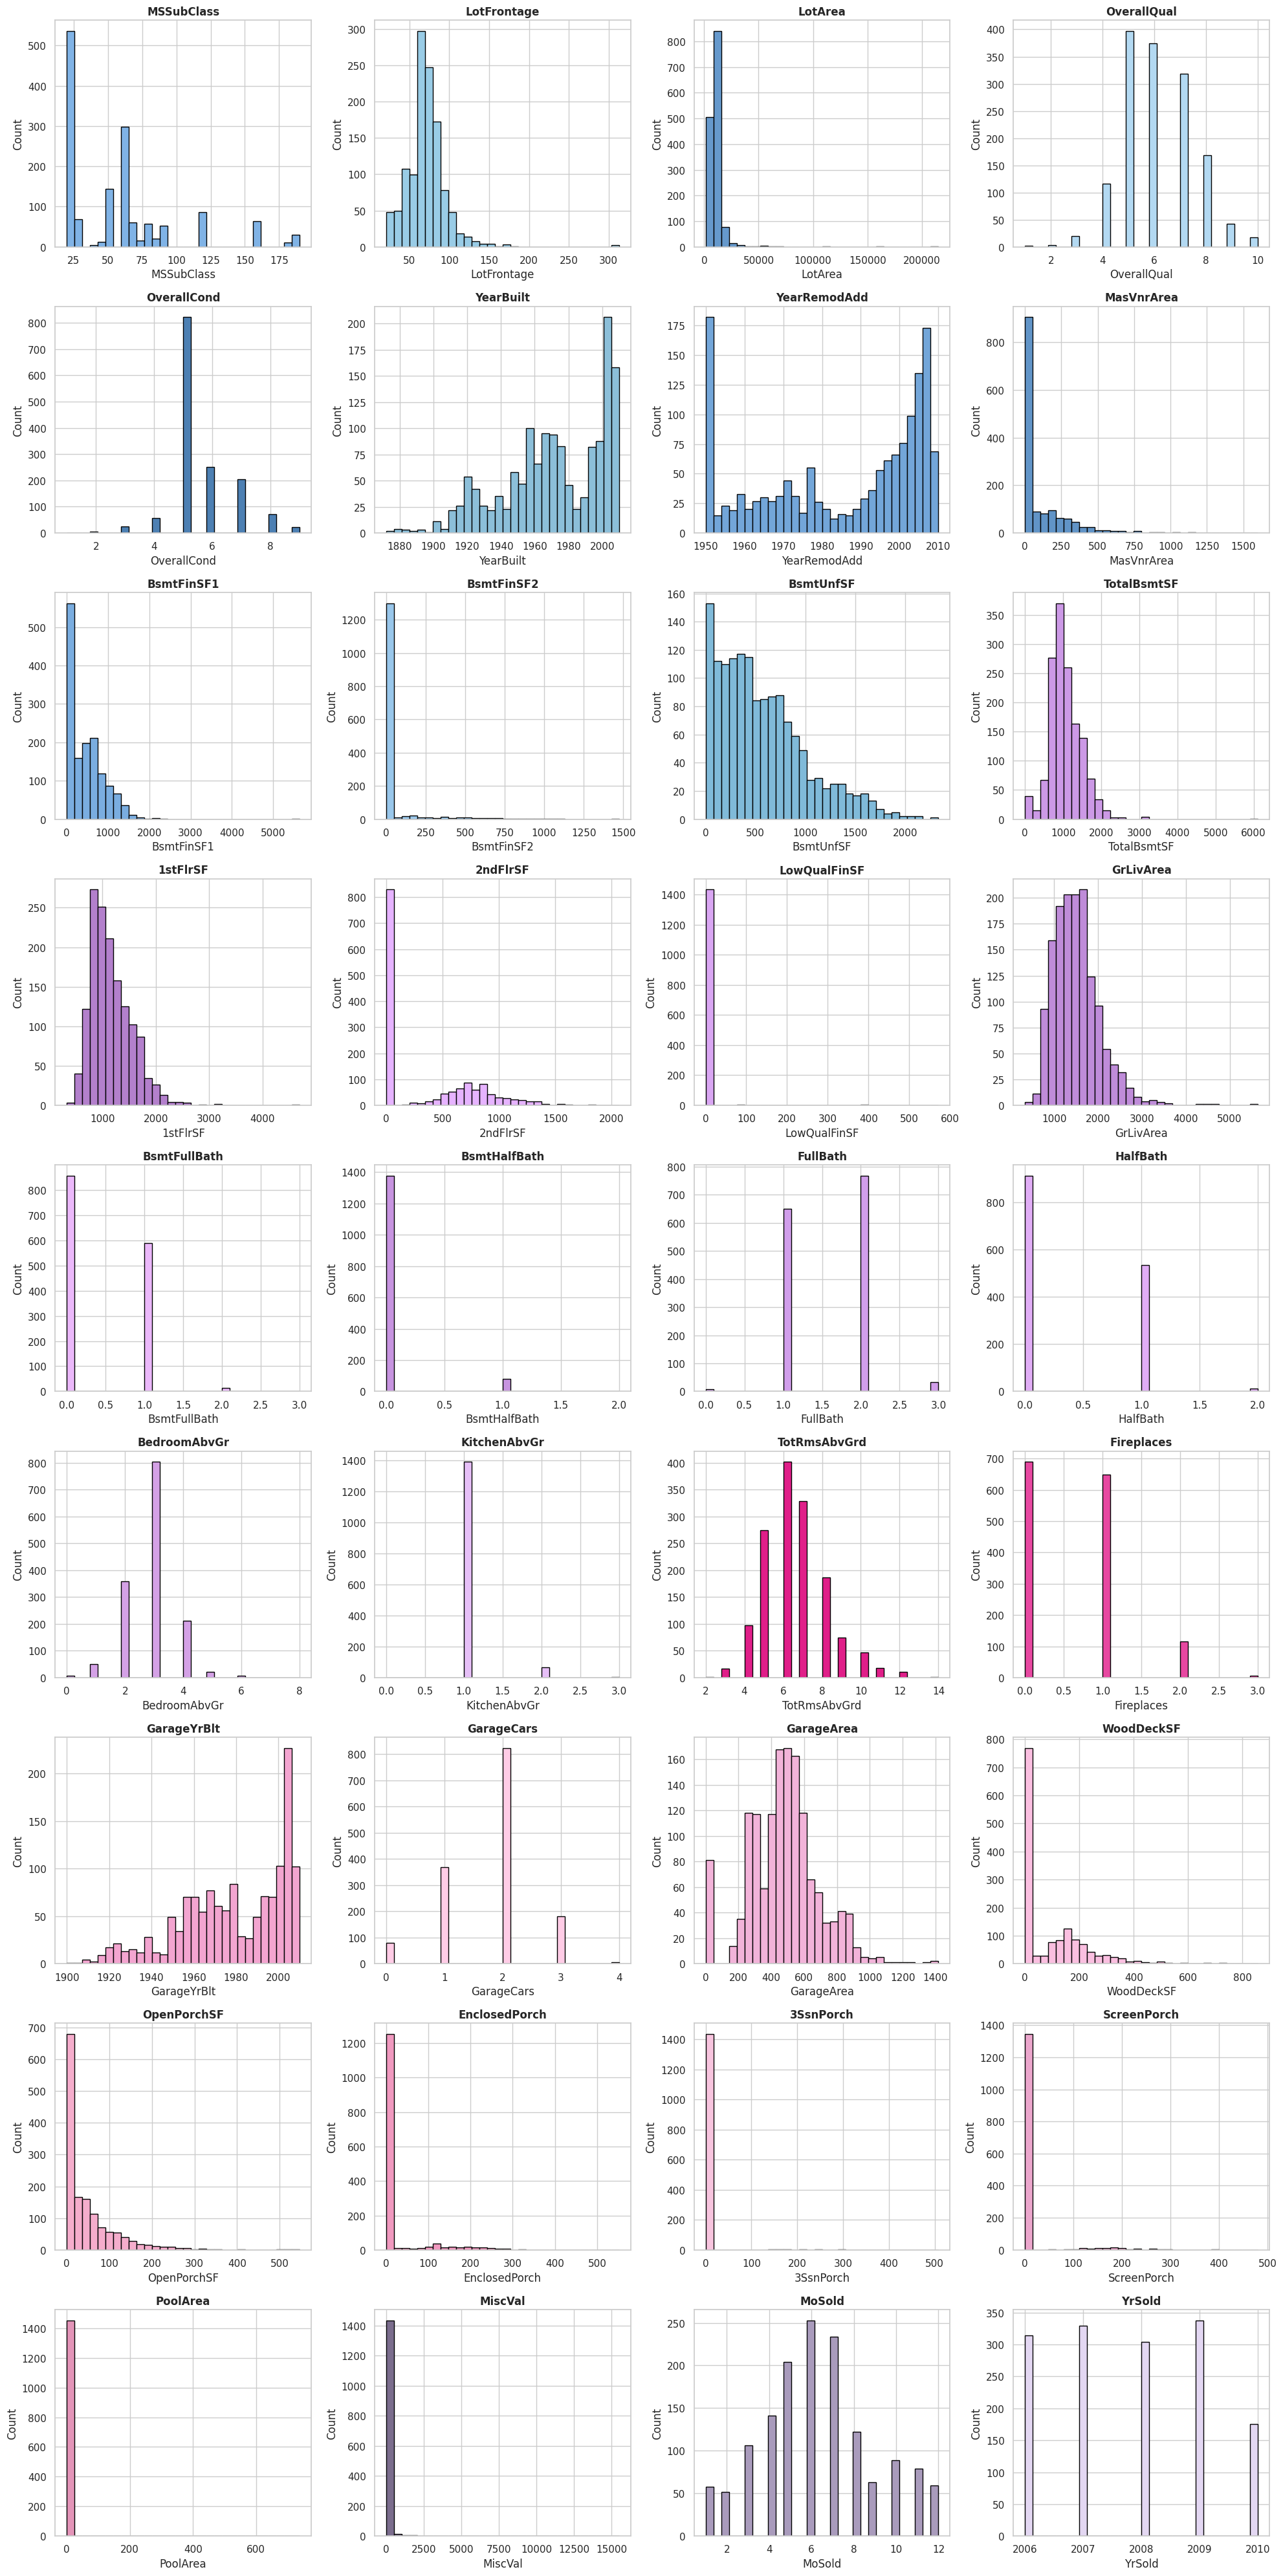

In [16]:
n_cols = 4
n_rows = 9


fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 40))
axes = axes.flatten()

n = numeric_columns.copy()
n.drop(columns=['SalePrice'], inplace=True)

# Plot percentage histograms
for i, col in enumerate(n):
    axes[i].hist(train_data[col].dropna(), bins=30, color=my_palette[i], edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

# Hide unused subplots
#The value of i here is the last value from the previous loop. The range must start from 0 instead
for j in range(len(numeric_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### Histogram-Based Analysis: Distribution & Suitability for Linear Regression

The percentage histograms show how the values of each numeric feature are distributed across the dataset. These visualizations are critical for identifying:

- **Skewed distributions**
- **Sparse or binary features**
- **Dominant modes or zero-inflated features**
- **Potential transformations or feature removals**

---

##### Features with Continuous, Right-Skewed Distributions (Potentially Useful)

These features have long right tails but contain a meaningful spread of values. They may benefit from **log transformation**, but since we’re only applying scaling, we choose to keep them:

- `MasVnrArea`
- `BsmtFinSF1`
- `2ndFlrSF`
- `WoodDeckSF`
- `OpenPorchSF`

 These features show variability and tend to increase gradually, which suits linear models once scaled. However, outliers may still affect performance.

---

##### Sparse or Near-Zero Features

These features have **very high level of 0**, with a tiny fraction of non-zero values:

- `BsmtFinSF2`, `LowQualFinSF`
- `3SsnPorch`, `ScreenPorch`, `PoolArea`, `MiscVal`, `EnclosedPorch`

Most of the data points here lie at 0 (~90–100%). Without proper binarization or transformation, these features:
- **Don’t contribute much signal** to a linear model
- Might **bias the coefficients**
- Will not benefit significantly from standard scaling

Consider removing these or replacing with binary flags in future iterations.

---

##### Discrete Low-Cardinality Features

Features like:

- `BsmtFullBath`, `BsmtHalfBath`, `HalfBath`

show **very few unique values** (0, 1, 2), often as vertical lines in scatter plots and sharp spikes in histograms. They are categorical-like but stored as numeric.

In linear regression:
- They’re better used as **categorical features** in logistic regression

Since we only scale features, we **choose to remove them** to avoid misleading coefficients.

---

#### Conclusion

| Feature Type              | Examples                         | Action                       |
|---------------------------|----------------------------------|------------------------------|
| Continuous & right-skewed | `GrLivArea`, `BsmtFinSF1`        | Keep & scale                 |
| Sparse/zero-heavy         | `PoolArea`, `MiscVal`            | Likely drop (weak signal)    |
| Discrete integer (0–2)    | `BsmtHalfBath`, `HalfBath`       | Drop (not suited for scaling)|

This filtering ensures that only features that contribute **meaningful linear variance** remain, which improves the stability and interpretability of the linear regression model.


# **Corelation Matrix**

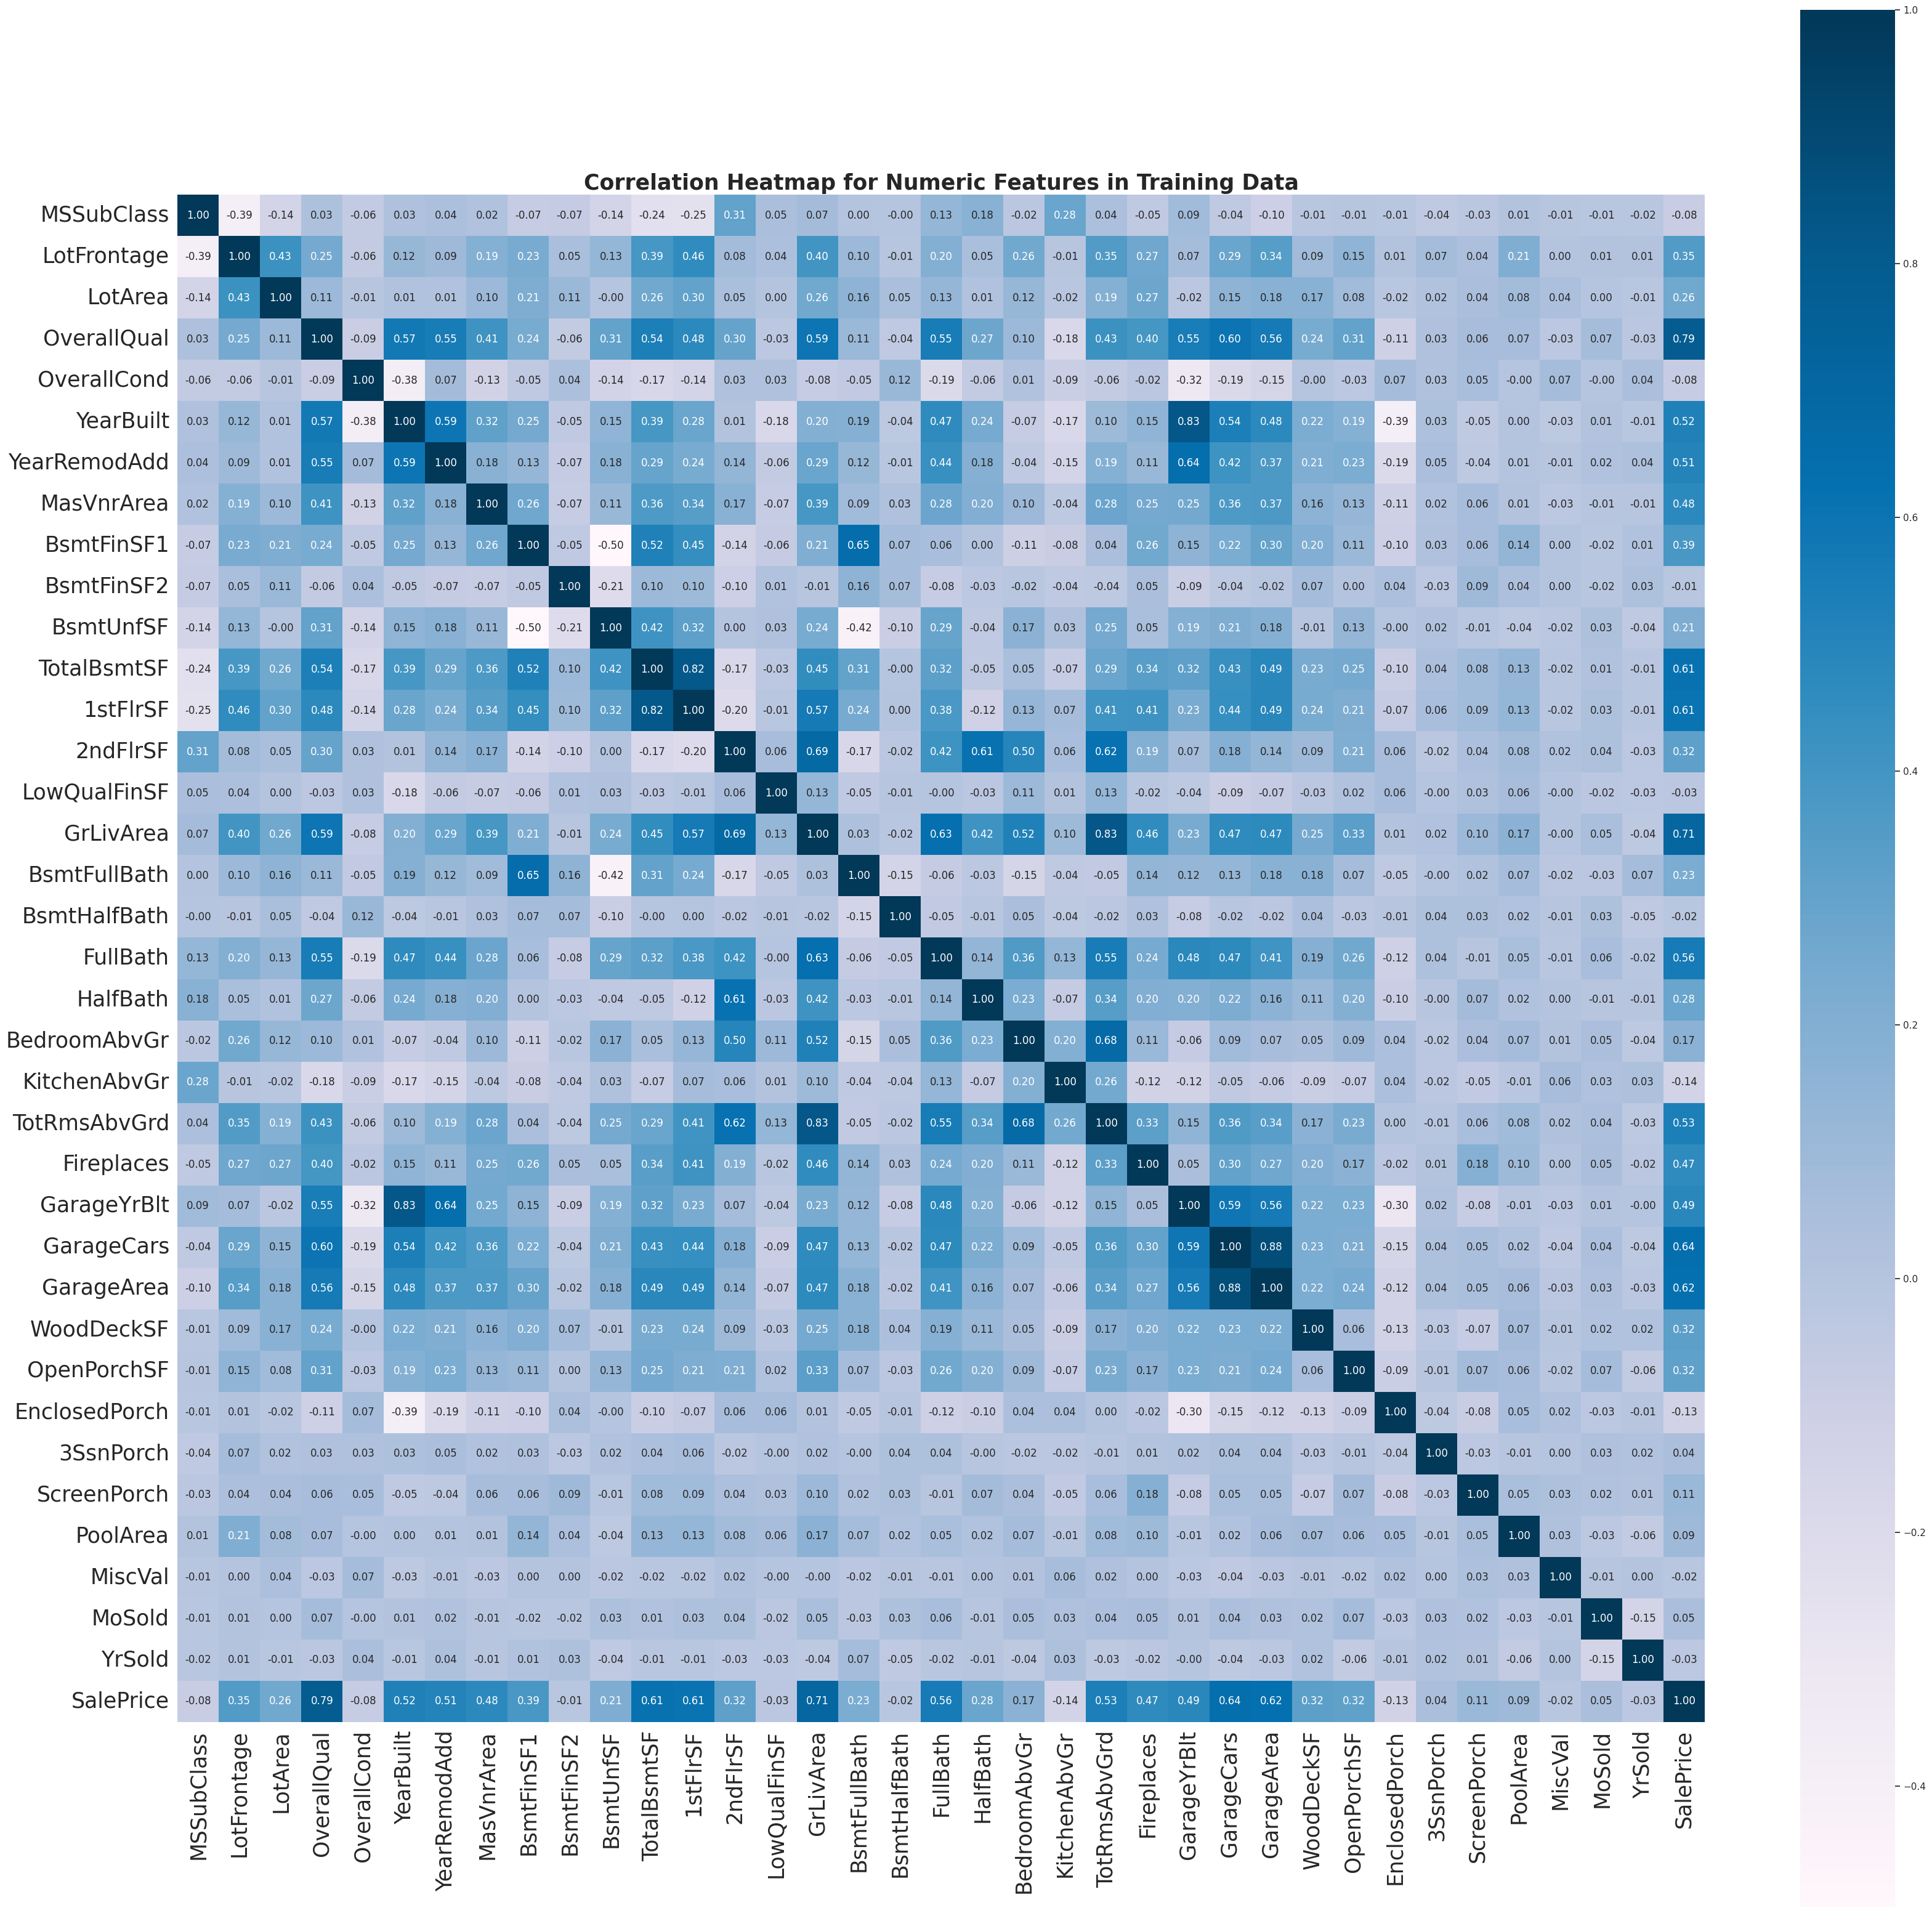

In [17]:
# Calculate the correlation matrix for the numeric columns
correlation_matrix = numeric_columns.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(40, 40))
sns.heatmap(correlation_matrix, annot=True, cmap='PuBu', fmt='.2f', square=True, cbar=True)
plt.title("Correlation Heatmap for Numeric Features in Training Data",size=25)
plt.xticks(size=25)
plt.yticks(size=25)
plt.show()

# **Correlation Heatmap Insights: Feature Selection & Multicollinearity in Linear Regression**

This heatmap shows **Pearson correlation coefficients** between all numerical features in the dataset, including the target `SalePrice`.

##### 1. Finding Predictive Features
Features with high absolute correlation with `SalePrice` (e.g., > 0.5) are strong candidates for inclusion in a linear regression model, since they are likely to help explain the variance in the target.

Strong positive correlations with `SalePrice` include:
- `OverallQual` (~0.79)
- `GrLivArea` (~0.71)
- `GarageCars` and `GarageArea` (~0.64)
- `TotalBsmtSF`, `1stFlrSF`, `FullBath` (~0.55–0.6)
These features provide meaningful signal to the model.

---

##### 2. Identifying Multicollinearity Between Features (Not Just with Target)

**Multicollinearity** occurs when two or more features are strongly correlated with each other, which can:
- Inflate variance in coefficient estimates
- Reduce model interpretability
- Harm generalization

From the heatmap, we observe several **strong feature-to-feature correlations**:

| Feature Pair               | Correlation | Explanation                        |
|----------------------------|-------------|------------------------------------|
| `GarageCars` vs `GarageArea` | ~0.88      | Almost the same information        |
| `1stFlrSF` vs `TotalBsmtSF` | ~0.82       | Larger first floor often = larger basement |
| `GrLivArea` vs `TotRmsAbvGrd` | ~0.83     | More living area → more rooms      |
| `YearBuilt` vs `GarageYrBlt` | ~0.83     | Newer houses tend to have newer garages |

**Action**: When two features are highly correlated with each other, we may keep only one — especially if both are also correlated with `SalePrice` — to reduce redundancy and stabilize coefficient estimates.

---

##### 3. Low or No Correlation Features

Some features show low or no correlation with most other features or with `SalePrice`, e.g.:
- `MiscVal`, `3SsnPorch`, `BsmtHalfBath` - **Strength the assumption that needed to be dropped.**

These are unlikely to help a linear model and may introduce noise.

➡ Consider removing or transforming them.

---

#### 4. Correlation ≠ Causation & Limitations

- Pearson correlation only measures **linear** relationships.
- Non-linear relationships will be missed, even if they are strong.
- Correlation can be sensitive to outliers.

That’s why this plot is just one tool. We should also examine:
- Scatterplots
- Domain knowledge
- Feature importance from models

---

#### Summary: What to Take from the Heatmap

| What We Learn                        | How It Helps Us                              |
|-------------------------------------|----------------------------------------------|
| Which features strongly relate to `SalePrice` | Use them as predictors in the model         |
| Which features are highly correlated with each other | Remove duplicates, avoid multicollinearity |
| Which features are weak or irrelevant | Drop or transform                            |

This analysis helps build a **robust and interpretable linear regression model**.


## **Describe**

We use the `.describe()` function to generate summary statistics for each numerical feature.

This includes key measures such as:
- **count**: number of non-null entries  
- **mean** and **std**: average and standard deviation  
- **min**, **25%**, **50% (median)**, **75%**, and **max**: distribution quantiles

We now focus on features that may:
- Identify **potential outliers**, using the **IQR (interquartile range)** method  
- Be **highly spread**, where the difference between the IQR and standard deviation indicates irregularity or skew

This step helps us understand which features are **most relevant and trustworthy** for our model, and whether further preprocessing is required — such as normalization, log transformation, or outlier handling.

---

We also use this step to justify **standardization**.  
Many statistical techniques, including **Pearson correlation**, assume that features follow a roughly **normal distribution** and are on similar scales.
Furthermore, some statistical tests — like t-tests or confidence intervals — rely on the assumption of normality to be valid.

After the table, we will refer to specific columns in the summary table that raise suspicion.

In [18]:
numeric_columns.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315   
std      30.202904     20.645407   181.066207   456.098091   161.319273   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean    567.240411  1057.429452  1162.626712   346.992466      5.844521   
std     441.866955   438.705324   386.587738   436.528436     48.623081   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     223.000000   795.750000   882.000000     0.000000      0.000000   
50%     477.500000   991.500000  1087.000000     0.000000      0.000000   
75%     808.000000  1298.250000  1391.250000   728.000000      0.000000   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean   1515.463699      0.425342      0.057534     1.565068     0.382877   
std     525.480383      0.518911      0.238753     0.550916     0.502885   
min     334.000000      0.000000      0.000000     0.000000     0.000000   
25%    1129.500000      0.000000      0.000000     1.000000     0.000000   
50%    1464.000000      0.000000      0.000000     2.000000     0.000000   
75%    1776.750000      1.000000      0.000000     2.000000     1.000000   
max    5642.000000      3.000000      2.000000     3.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt  \
count   1460.000000   1460.000000   1460.000000  1460.000000  1379.000000   
mean       2.866438      1.046575      6.517808     0.613014  1978.506164   
std        0.815778      0.220338      1.625393     0.644666    24.689725   
min        0.000000      0.000000      2.000000     0.000000  1900.000000   
25%        2.000000      1.000000      5.000000     0.000000  1961.000000   
50%        3.000000      1.000000      6.000000     1.000000  1980.000000   
75%        3.000000      1.000000      7.000000     1.000000  2002.000000   
max        8.000000      3.000000     14.000000     3.000000  2010.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000   
mean      1.767123   472.980137    94.244521    46.660274      21.954110   
std       0.747315   213.804841   125.338794    66.256028      61.119149   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   334.500000     0.000000     0.000000       0.000000   
50%       2.000000   480.000000     0.000000    25.000000       0.000000   
75%       2.000000   576.000000   168.000000    68.000000   

#### Summary of Features with Suspicious Distributions or Low Predictive Potential

Based on the `.describe()` output for multiple numerical features, we identified several columns that raise concerns regarding their statistical distribution and suitability for linear regression modeling. These columns require additional analysis before inclusion or transformation.

---

#### Features with many zeros and extreme outliers:
`MasVnrArea`, `EnclosedPorch`, `3SsnPorch`, `ScreenPorch`, `PoolArea`, `MiscVal`

These features show:
- Median and 75th percentile = 0
- Extremely high max values relative to the mean
- Very high standard deviation

 Interpretation: Strong **right-skewed distributions** with many inactive cases and rare large values.  


---

#### Features with extreme value ranges:

`GrLivArea`, `BsmtFinSF1`, `2ndFlrSF`, `LowQualFinSF`

These columns show:
- Large differences between mean and max
- Standard deviation close to or greater than the mean

 Interpretation: High potential for **influential outliers**  


---

#### Low-variance or discrete features with few possible values:

`BsmtFullBath`, `BsmtHalfBath`, `HalfBath`

These are integer features with:
- Mostly zeros
- Very small max values (e.g., `HalfBath` max = 2)
- Low variance


---

#### Area-based features with skew and long tails:

`OpenPorchSF`, `WoodDeckSF`, `BsmtFinSF2`

These features share:
- Many zeros
- Median = 0, but large standard deviation
- Max values (e.g., `WoodDeckSF` = 1424) significantly higher than 75th percentile

Interpretation: **Heavy-tailed distributions** with potential outlier influence  
➡ We might consider scaling in order to reduce range bias

---

#### Conclusion:

All of these features should undergo further analysis:
- Plotting histograms or boxplots
- Checking correlation with `SalePrice`

Only after this investigation will we decide what is the right thing to do with those features.

# **Observations:**

After making visual relations between SalePrice and the rest of the features we can learn few things:

1. Good features: OverallQual, GrLicArea, GarageCars, GarageArea, TotalBsmtSF,1stFlrSF
2. Bad features: YrSold, MiscVal, PoolArea, 3SsnPorch, ScreenPorch, EnclosedPorch, LowQualFinSF, KitchenAbvGr

We will try to drop the weak features and see if it helps to improve the loss.
For that purpose we will compare RMSE and R^2 in both datasets.
The one with the weak features and the other which is without them.

In [19]:
# Creating copies of the data with weak features
train_data_with_weak_features = train_data_cleaned.copy()
test_data_with_weak_features = test_data_cleaned.copy()

train_data_with_weak_features.info()
print()

# Removing weak features
weak_para = ['YrSold', 'MiscVal','PoolArea','3SsnPorch','ScreenPorch','EnclosedPorch','LowQualFinSF','KitchenAbvGr']
train_data_cleaned = train_data_with_weak_features.drop(columns = weak_para)
test_data_cleaned = test_data_with_weak_features.drop(columns = weak_para)

train_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

#**Useful functions**

In [20]:
# Separates the target and prepares preprocessing
def prepare_features_and_target(df):
    X = df.drop(columns=["SalePrice"])
    y = df["SalePrice"]

    numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = X.select_dtypes(include=['object']).columns

    numeric_transformer = StandardScaler()
    categorical_transformer = OneHotEncoder(handle_unknown='ignore')

    preprocessor = ColumnTransformer(transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

    return X, y, preprocessor


# Splits the data, preprocesses, and returns transformed versions
def preprocess_split_data(X, y, preprocessor, test_size=0.2, random_state=42):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=test_size, random_state=random_state)
    X_train_processed = preprocessor.fit_transform(X_train)
    X_val_processed = preprocessor.transform(X_val)
    return X_train_processed, X_val_processed, y_train, y_val


# Trains SGDRegressor with custom loop and tracks loss.
def train_sgd_model(X_train, X_val, y_train, y_val, learning_rate=0.001, epochs=150):
    model = SGDRegressor(max_iter=1, tol=None, warm_start=True, eta0=learning_rate, learning_rate='constant')
    train_losses, val_losses = [], []

    for _ in range(epochs):
        model.fit(X_train, y_train)
        train_pred = model.predict(X_train)
        val_pred = model.predict(X_val)
        train_losses.append(mean_squared_error(y_train, train_pred))
        val_losses.append(mean_squared_error(y_val, val_pred))

    final_metrics = pd.DataFrame({
        "train_r2": [r2_score(y_train, train_pred)],
        "train_rmse": [np.sqrt(train_losses[-1])],
        "val_r2": [r2_score(y_val, val_pred)],
        "val_rmse": [np.sqrt(val_losses[-1])]
    })

    return model, train_losses, val_losses, final_metrics


# Trains a linear regression model and returns evaluation.
def train_linear_model(X_train, X_val, y_train, y_val):
    model = LinearRegression()
    model.fit(X_train, y_train)

    train_pred = model.predict(X_train)
    val_pred = model.predict(X_val)

    metrics = pd.DataFrame({
        "train_r2": [r2_score(y_train, train_pred)],
        "train_rmse": [np.sqrt(mean_squared_error(y_train, train_pred))],
        "val_r2": [r2_score(y_val, val_pred)],
        "val_rmse": [np.sqrt(mean_squared_error(y_val, val_pred))]
    })

    return model, metrics


# Create Plots
def plot_scores(parameter, parameter_values, train_r2, val_r2, train_rmse, val_rmse):
    """
    Plot R^2 and RMSE scores against a parameter (e.g., Epochs or Learning Rate).

    Args:
    - parameter (str): Name of the parameter (e.g., "Epochs").
    - parameter_values (list): List of values for the parameter.
    - train_r2 (list): R^2 scores on the training set.
    - val_r2 (list): R^2 scores on the validation set.
    - train_rmse (list): RMSE scores on the training set.
    - val_rmse (list): RMSE scores on the validation set.
    """
    plt.figure(figsize=(12, 5))

    score_dict = {
        "R^2 Score": (train_r2, val_r2),
        "RMSE": (train_rmse, val_rmse)
    }

    for i, (score_name, (train_scores, val_scores)) in enumerate(score_dict.items(), 1):
        plt.subplot(1, 2, i)
        plt.plot(parameter_values, train_scores, marker='o', label=f'Train {score_name}', color=my_palette[20])
        plt.plot(parameter_values, val_scores, marker='o', label=f'Validation {score_name}', color=my_palette[1])
        plt.xscale('log')
        plt.xlabel(parameter)
        plt.ylabel(score_name)
        plt.title(f'{score_name} vs {parameter}')
        plt.legend()

    plt.tight_layout()
    plt.show()


# Display results of losses - R^2 and RMSE
def show_results(train_r2, train_rmse, val_r2, val_rmse, model_name="Model"):
    """
    Displays the results of a model in a DataFrame format with a single row.
    """
    df = pd.DataFrame({
        "train_r2": [train_r2],
        "train_rmse": [train_rmse],
        "val_r2": [val_r2],
        "val_rmse": [val_rmse]
    }, index=[model_name])

    display(df)


# **Results without weak features**

In [21]:
# Step 1: Prepare features and target
X, y, preprocessor = prepare_features_and_target(train_data_cleaned)

# Step 2: Preprocess data and split
X_train, X_val, y_train, y_val = preprocess_split_data(X, y, preprocessor)

# Step 3: Train with SGD Regressor
sgd_result = train_sgd_model(X_train, X_val, y_train, y_val, learning_rate=0.001, epochs=150)
show_results(*sgd_result[3].values[0], model_name="SGD")


train_r2    train_rmse    val_r2      val_rmse
SGD  0.894322  25106.158338  0.882511  30019.627274

In [22]:
# Step 4: Train with Linear Regression
lr_result = train_linear_model(X_train, X_val, y_train, y_val)
show_results(*lr_result[1].values[0], model_name="Linear Regression")

train_r2    train_rmse    val_r2      val_rmse
Linear Regression  0.931701  20183.447907  0.881566  30140.119178

# **Results with weak features**

In [23]:
# Step 1: Prepare features and target
X, y, preprocessor = prepare_features_and_target(train_data_with_weak_features)

# Step 2: Preprocess data and split
X_train, X_val, y_train, y_val = preprocess_split_data(X, y, preprocessor)

# Step 3: Train with SGD Regressor
sgd_result = train_sgd_model(X_train, X_val, y_train, y_val, learning_rate=0.001, epochs=150)
show_results(*sgd_result[3].values[0], model_name="SGD")

train_r2    train_rmse    val_r2      val_rmse
SGD  0.898878  24559.106201  0.884209  29801.945104

In [24]:
# Step 4: Train with Linear Regression
lr_result = train_linear_model(X_train, X_val, y_train, y_val)
show_results(*lr_result[1].values[0], model_name="Linear Regression")

train_r2    train_rmse    val_r2      val_rmse
Linear Regression  0.933493  19916.930715  0.885164  29678.783754

#**Results with/out weak features - comparisons**

| Model | Setting          | Train R² | Train RMSE | Val R²  | Val RMSE |
|-------|------------------|----------|------------|---------|----------|
| SGD   | Original         | 0.9040   | 23917.98   | 0.8832  | 29923.45 |
| SGD   | After Removal    | 0.9013   | 24251.91   | 0.8745  | 31015.33 |
| LR    | Original         | 0.9334   | 19916.93   | 0.8851  | 29678.77 |
| LR    | After Removal    | 0.9317   | 20183.44   | 0.8815  | 30140.15 |



- **SGD:**
  - Removing weak parameters slightly **decreased train performance** (R² ↓, RMSE ↑),
  - **Validation RMSE also worsened** by ~1091 → a **minor generalization loss**.

- **Linear Regression (LR):**
  - Train performance slightly decreased (R² ↓, RMSE ↑),
  - **validation RMSE also worsened** by ~461.38

**Conclusion:**

Removing weak features led us to observe a slight decrease in training performance and a minor increase in validation RMSE, suggesting a negative impact on generalization performance.

In this instance, removing the identified "weak" features did not lead to the desired improvements and even slightly hurt the models' ability to generalize to unseen data.

- **Because of that we will keep the weak features**.

#**Trying different learning rates and number of epocs to find best RMSE loss**

In [25]:
X = train_data_with_weak_features.drop(columns=["SalePrice"])
y = train_data_with_weak_features["SalePrice"]

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Preprocessing pipeline
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the features
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_val_preprocessed = preprocessor.transform(X_val)

# Define hyperparameter grids
learning_rates = [0.0001, 0.001, 0.01, 0.1]
epochs_list = [100, 500, 1000, 2500, 5000, 10000, 20000]

# Store results
results = []

# Iterate over hyperparameters
for learning_rate in learning_rates:
    for epochs in epochs_list:
        # Initialize the SGDRegressor
        sgd_regressor = SGDRegressor(max_iter=epochs, tol=None, eta0=learning_rate, learning_rate='constant', random_state=42)

        # Train the model
        sgd_regressor.fit(X_train_preprocessed, y_train)

        # Predict and calculate losses
        y_train_pred = sgd_regressor.predict(X_train_preprocessed)
        y_val_pred = sgd_regressor.predict(X_val_preprocessed)
        train_loss = mean_squared_error(y_train, y_train_pred)
        val_loss = mean_squared_error(y_val, y_val_pred)
        train_r2 = r2_score(y_train, y_train_pred)
        val_r2 = r2_score(y_val, y_val_pred)
        train_rmse = np.sqrt(train_loss)
        val_rmse = np.sqrt(val_loss)

        # Store results
        results.append([learning_rate, epochs, train_r2, train_rmse, val_r2, val_rmse])

# Create a DataFrame from the results
results_df = pd.DataFrame(results, columns=['Learning Rate', 'Epochs', 'Train R^2', 'Train RMSE', 'Val R^2', 'Val RMSE'])

# Display the results
display(results_df)

Learning Rate  Epochs     Train R^2    Train RMSE       Val R^2  \
0          0.0001     100  8.706075e-01  2.778071e+04  8.686169e-01   
1          0.0001     500  8.937187e-01  2.517777e+04  8.750295e-01   
2          0.0001    1000  8.997796e-01  2.444932e+04  8.784422e-01   
3          0.0001    2500  9.070314e-01  2.354817e+04  8.826280e-01   
4          0.0001    5000  9.136849e-01  2.268988e+04  8.849625e-01   
5          0.0001   10000  9.207316e-01  2.174397e+04  8.872881e-01   
6          0.0001   20000  9.271600e-01  2.084366e+04  8.907398e-01   
7          0.0010     100  8.978830e-01  2.467958e+04  8.761276e-01   
8          0.0010     500  9.029408e-01  2.406064e+04  8.638255e-01   
9          0.0010    1000  9.121711e-01  2.288799e+04  8.875052e-01   
10         0.0010    2500  9.272134e-01  2.083602e+04  8.921334e-01   
11         0.0010    5000  9.275824e-01  2.078313e+04  8.919980e-01   
12         0.0010   10000  9.283109e-01  2.067833e+04  8.837405e-01   
13         0.0010   20000  9.296265e-01  2.048771e+04  8.896152e-01   
14         0.0100     100 -1.290386e+12  8.773012e+10 -6.219098e+11   
15         0.0100     500 -9.391181e+11  7.484262e+10 -4.752257e+11   
16         0.0100    1000 -1.298320e+11  2.782785e+10 -5.396649e+10   
17         0.0100    2500 -9.695570e+11  7.604585e+10 -2.955981e+11   
18         0.0100    5000 -1.032266e+13  2.481331e+11 -3.870431e+11   
19         0.0100   10000 -1.743946e+12  1.019895e+11 -8.179268e+11   
20         0.0100   20000 -1.394359e+11  2.883873e+10 -8.347369e+10   
21         0.1000     100 -2.372143e+15  3.761484e+12 -1.465415e+15   
22         0.1000     500 -3.710236e+15  4.704242e+12 -1.879075e+15   
23         0.1000    1000 -2.141858e+15  3.574244e+12 -1.439752e+15   
24         0.1000    2500 -1.704267e+15  3.188289e+12 -9.800503e+14   
25         0.1000    5000 -7.559830e+15  6.714982e+12 -5.133933e+15   
26         0.1000   10000 -1.518101e+15  3.009117e+12 -1.153719e+15   
27         0.1000   20000 -3.474758e+15  4.552512e+12 -2.324240e+15   

        Val RMSE  
0   3.174510e+04  
1   3.096069e+04  
2   3.053503e+04  
3   3.000469e+04  
4   2.970480e+04  
5   2.940301e+04  
6   2.894929e+04  
7   3.082436e+04  
8   3.231877e+04  
9   2.937468e+04  
10  2.876407e+04  
11  2.878212e+04  
12  2.986215e+04  
13  2.909789e+04  
14  6.906701e+10  
15  6.037496e+10  
16  2.034553e+10  
17  4.761653e+10  
18  5.448621e+10  
19  7.920711e+10  
20  2.530357e+10  
21  3.352642e+12  
22  3.796461e+12  
23  3.323157e+12  
24  2.741771e+12  
25  6.275264e+12  
26  2.974795e+12  
27  4.222283e+12

#**Hyperparameters effects**
- Best combination was 2500 Epocs and 0.001 learning Rate

### **Tuning Hyperparameters for SGD Regressor**

---

#### **Effect of Varying Number of Epochs (Learning Rate = 0.001)**

| Epochs | Train R² | Train RMSE | Val R²  | Val RMSE |
|--------|----------|------------|---------|----------|
| 100    | 0.8979   | 24679.58   | 0.8761  | 30824.36 |
| 500    | 0.9029   | 24060.64   | 0.8638  | 32318.77 |
| 1000   | 0.9122   | 22887.99   | 0.8875  | 29374.68 |
| 2500   | 0.9272   | 20836.02   | 0.8921  | 28764.07 |
| 5000   | 0.9276   | 20783.13   | 0.8920  | 28782.12 |
| 10000  | 0.9283   | 20678.33   | 0.8837  | 29862.15 |
| 20000  | 0.9296   | 20487.71   | 0.8896  | 29097.89 |

**Observation:**  
- Increasing the number of epochs generally improves both train and validation performance up to **2500 epochs**, for this specific learning rate.
- Choosing 2500 epochs gives us optimal results, before validation performance starts fluctuating.

---

#### **Effect of Varying Learning Rate (Epochs = 2500)**

| Learning Rate | Train R² | Train RMSE | Val R²  | Val RMSE |
|---------------|----------|------------|---------|----------|
| 0.0001        | 0.9070   | 23548.17   | 0.8826  | 30004.69 |
| 0.001         | 0.9272   | 20836.02   | 0.8921  | 28764.07 |
| 0.01          | -1.29e11  | 2.78e10    | -5.39e10 | 2.03e10  |
| 0.1           | -1.70e15 | 3.18e12    | -9.80e14 | 2.74e12  |

**Observation:**  
- The best learning rate is **0.001**, providing the highest validation R^2 and the lowest validation RMSE.
- Lower learning rates like 0.0001 take longer to converge, as expected, yet gives acceptable results.
- Larger learning rates (0.01 and 0.1) lead to significantly worse performance, as seen with the negative R^2 and extremely high RMSE values, indicating potential divergence.

---

### **Final Choice**
- **Epochs:** 2500  
- **Learning Rate:** 0.001

---

# **Epocs graph:**

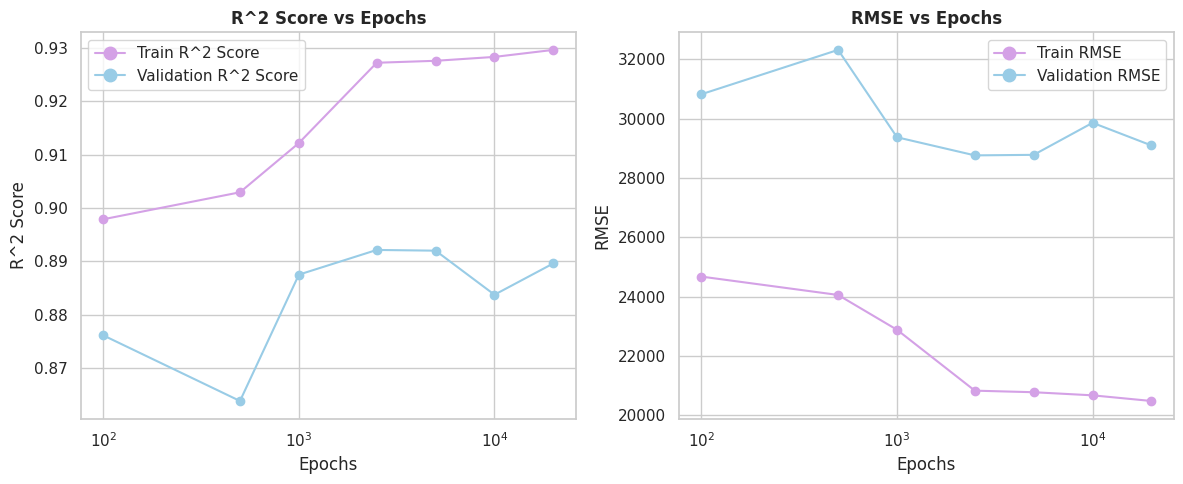

In [26]:
# Data for plotting
epochs = results_df['Epochs'].unique()  # Extract unique epoch values from results_df
train_r2 = results_df[results_df['Learning Rate'] == 0.001]['Train R^2'].values  # Filter for learning rate 0.001 and extract Train R^2
val_r2 = results_df[results_df['Learning Rate'] == 0.001]['Val R^2'].values  # Filter for learning rate 0.001 and extract Val R^2
train_rmse = results_df[results_df['Learning Rate'] == 0.001]['Train RMSE'].values  # Filter for learning rate 0.001 and extract Train RMSE
val_rmse = results_df[results_df['Learning Rate'] == 0.001]['Val RMSE'].values  # Filter for learning rate 0.001 and extract Val RMSE

plot_scores("Epochs", epochs, train_r2, val_r2, train_rmse, val_rmse)

# **Learning rate graph:**

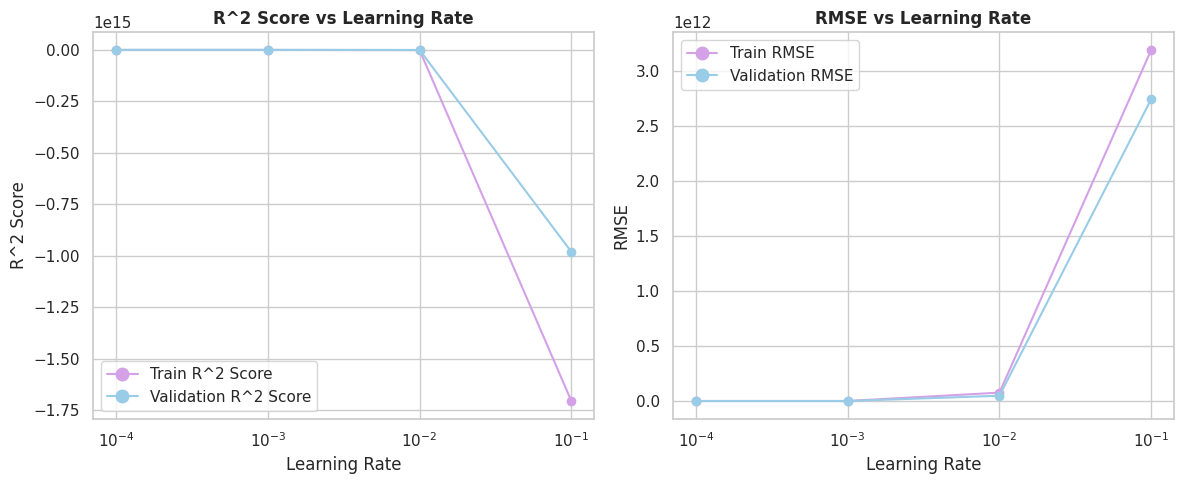

In [27]:
# Data for plotting (Update with your actual results)
learning_rates = results_df['Learning Rate'].unique()  # Extract unique learning rate values from results_df
train_r2 = results_df[results_df['Epochs'] == 2500]['Train R^2'].values  # Filter for epochs 5000 and extract Train R^2
val_r2 = results_df[results_df['Epochs'] == 2500]['Val R^2'].values  # Filter for epochs 5000 and extract Val R^2
train_rmse = results_df[results_df['Epochs'] == 2500]['Train RMSE'].values  # Filter for epochs 5000 and extract Train RMSE
val_rmse = results_df[results_df['Epochs'] == 2500]['Val RMSE'].values  # Filter for epochs 5000 and extract Val RMSE

plot_scores("Learning Rate", learning_rates, train_r2, val_r2, train_rmse, val_rmse)

#**Training the models with our new knowledge about learning rates and number of epocs**

In [28]:
# Step 1: Prepare features and target
X, y, preprocessor = prepare_features_and_target(train_data_with_weak_features)

# Step 2: Preprocess data and split
X_train, X_val, y_train, y_val = preprocess_split_data(X, y, preprocessor)

# Step 3: Train with SGD Regressor
sgd_result = train_sgd_model(X_train, X_val, y_train, y_val, learning_rate=0.001, epochs=2500)
# Extract prediction
sgd_model = sgd_result[0]
y_val_pred = sgd_model.predict(X_val)

show_results(*sgd_result[3].values[0], model_name="SGD")

train_r2    train_rmse    val_r2      val_rmse
SGD  0.926299  20966.481422  0.890405  28993.666453

In [29]:
# Step 4: Train with Linear Regression
lr_result = train_linear_model(X_train, X_val, y_train, y_val)
show_results(*lr_result[1].values[0], model_name="Linear Regression")

train_r2    train_rmse    val_r2      val_rmse
Linear Regression  0.933493  19916.930715  0.885164  29678.783754

In [32]:
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 95.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 15.0 MB/s eta 0:00:00


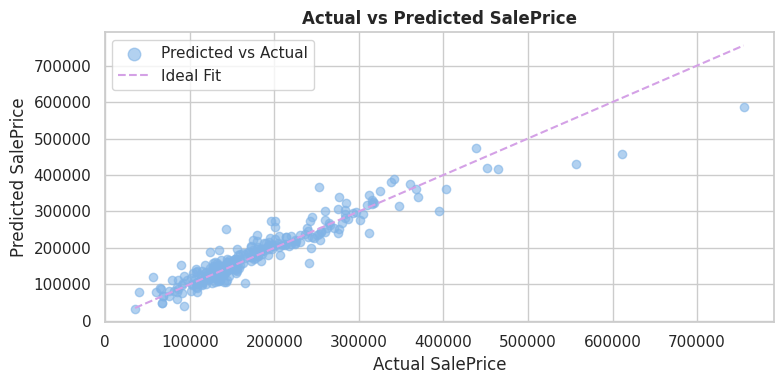

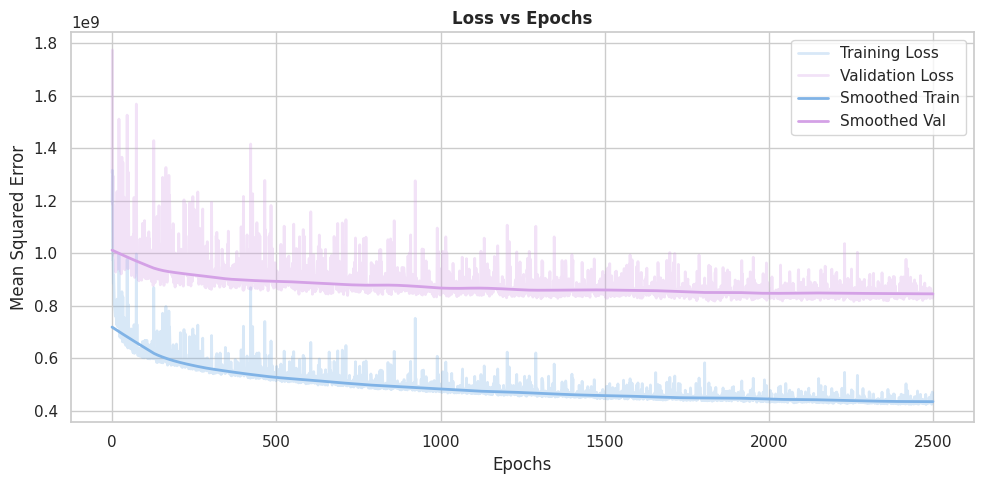

In [33]:
# Visualization of Loss vs Epochs
def moving_average(data, window_size=10):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Compute moving averages
train_ma = moving_average(sgd_result[1], window_size=10)
val_ma = moving_average(sgd_result[2], window_size=10)

plt.figure(figsize=(8, 4))
plt.scatter(y_val, y_val_pred, alpha=0.6, label="Predicted vs Actual")

plt.plot(
    [y_val.min(), y_val.max()],
    [y_val.min(), y_val.max()],
    linestyle='--',
    color=my_palette[20],
    label='Ideal Fit',
    zorder=10
)

plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs Predicted SalePrice")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Sample data for training and validation losses
epochs = list(range(1, 200))
train_losses = [np.random.uniform(0.1, 0.3) - (epoch * 0.001) for epoch in epochs]
val_losses = [np.random.uniform(0.15, 0.35) - (epoch * 0.001) for epoch in epochs]

from statsmodels.nonparametric.smoothers_lowess import lowess

train_smooth = lowess(sgd_result[1], np.arange(len(sgd_result[1])), frac=0.1)
val_smooth = lowess(sgd_result[2], np.arange(len(sgd_result[2])), frac=0.1)

plt.figure(figsize=(10, 5))
plt.plot(sgd_result[1], alpha=0.3, label='Training Loss', color=my_palette[0], linewidth=2)
plt.plot(sgd_result[2], alpha=0.3, label='Validation Loss', color=my_palette[20], linewidth=2)

plt.plot(train_smooth[:, 0], train_smooth[:, 1], label='Smoothed Train', color= my_palette[0], linewidth=2)
plt.plot(val_smooth[:, 0], val_smooth[:, 1], label='Smoothed Val', color=my_palette[20], linewidth=2)

plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Loss vs Epochs')
plt.legend()
plt.tight_layout()
plt.show()

* According to the graph above, it seems there is no improvement at all in the validation loss between 1000-2500 epocs, but according to table of the learning rates and the epocs we see there is an improvement actually. Since the dataset is not that big, we will leave it with 2500 epocs.

# **Loss in the train vs validation during epocs**

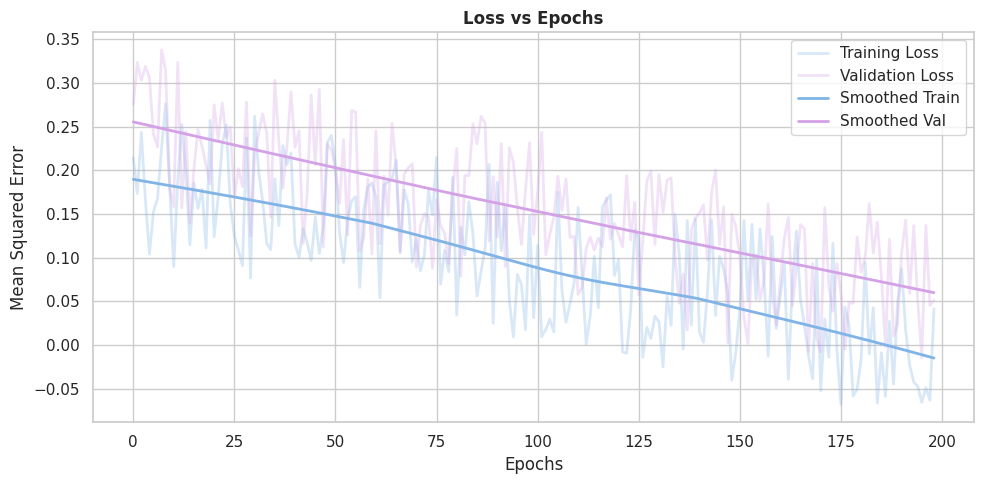

In [34]:
# # Sample data for training and validation losses
# epochs = list(range(1, 2500))
# train_losses = [np.random.uniform(0.1, 0.3) - (epoch * 0.001) for epoch in epochs]
# val_losses = [np.random.uniform(0.15, 0.35) - (epoch * 0.001) for epoch in epochs]

# # Visualization of Loss vs Epochs
# plt.figure(figsize=(10, 5))
# plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss')
# plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss', color=my_palette[20])
# plt.title('Loss vs Epochs')
# plt.xlabel('Epochs')
# plt.ylabel('Mean Squared Error')
# plt.title('Loss vs Epochs')
# plt.legend()
# plt.tight_layout()
# plt.show()

# Sample data for training and validation losses
epochs = list(range(1, 200))
train_losses = [np.random.uniform(0.1, 0.3) - (epoch * 0.001) for epoch in epochs]
val_losses = [np.random.uniform(0.15, 0.35) - (epoch * 0.001) for epoch in epochs]



from statsmodels.nonparametric.smoothers_lowess import lowess

train_smooth = lowess(train_losses, np.arange(len(train_losses)), frac=0.6)
val_smooth = lowess(val_losses, np.arange(len(val_losses)), frac=0.9)

plt.figure(figsize=(10, 5))
plt.plot(train_losses, alpha=0.3, label='Training Loss', color=my_palette[0], linewidth=2)
plt.plot(val_losses, alpha=0.3, label='Validation Loss', color=my_palette[20], linewidth=2)

plt.plot(train_smooth[:, 0], train_smooth[:, 1], label='Smoothed Train', color= my_palette[0], linewidth=2)
plt.plot(val_smooth[:, 0], val_smooth[:, 1], label='Smoothed Val', color=my_palette[20], linewidth=2)

plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Loss vs Epochs')
plt.legend()
plt.tight_layout()
plt.show()

#NEED TO TAKE CARE OF THAT

In [ ]:
# # Check if 'Id' exists in the test dataset
# if 'Id' in test_data_with_weak_features.columns:
#     test_ids = test_data_with_weak_features["Id"]  # Save test IDs
#     X2_test = test_data_with_weak_features.drop(columns=["Id"])  # Drop ID column
# else:
#     print("Column 'Id' is not present in the test dataset.")
#     test_ids = None
#     X2_test = test_data_with_weak_features  # Use the entire test dataset

# # Ensure test dataset columns align with training features
# missing_numeric_features = [col for col in numeric_features2 if col not in X2_test.columns]
# for col in missing_numeric_features:
#     X2_test[col] = 0  # Add missing numeric columns with default value

# missing_categorical_features = [col for col in categorical_features2 if col not in X2_test.columns]
# for col in missing_categorical_features:
#     X2_test[col] = ""  # Add missing categorical columns with default value

# # Standardize numeric features
# X2_test_scaled = scaler2.transform(X2_test[numeric_features2])

# # One-hot encode categorical features
# X2_test_encoded = encoder.transform(X2_test[categorical_features2]).toarray()

# # Combine processed numeric and categorical features
# X2_test_preprocessed = np.hstack((X2_test_scaled, X2_test_encoded))

# # Generate predictions
# test_predictions = sgd_regressor2.predict(X2_test_preprocessed)

# # Create submission DataFrame if 'Id' is available
# if test_ids is not None:
#     submission = pd.DataFrame({
#         "Id": test_ids,
#         "SalePrice": test_predictions
#     })
# else:
#     print("Cannot create submission file as 'Id' column is missing.")
#     submission = None

# # Save to CSV if submission is created
# if submission is not None:
#     submission_file = "/kaggle/working/submission.csv"
#     submission.to_csv(submission_file, index=False)
#     print(f"Submission file saved to {submission_file}")


In [ ]:
submission = pd.DataFrame({
    "Id": test_ids,
    "SalePrice": predictions
})
submission.to_csv("submission.csv", index=False)

In [ ]:
!kaggle competitions submit -c <House Prices - Advanced Regression Techniques> -f submission.csv -m "My submission from Colab"


# ADD SCREENSHOTS!

# Summary
## **Goal**
**Predict house prices in Ames, Iowa using Linear Regression and Stochastic Gradient Descent Regressor.**

---

## **Methodology**

### **Data Loading and Cleaning**
- Read data from `train.csv` and `test.csv`.
- Analyzed missing values using visualizations.
- Removed columns with more than **20% missing values**.
- Imputed remaining missing values:
  - **Median** for numeric features.
  - **Mode** for categorical features.

---

### **Exploratory Data Analysis (EDA)**
- In order to spot outliers and decide on transformations, we visualized relationships between numeric features and `SalePrice` using **regplots** and **barplot**.
- Created a **correlation matrix and heatmap** to identify predictive features and detect multicollinearity.
- Used `.describe()` for summary statistics to identify potential outliers and feature ranges.

---

### **Feature Selection**
- Based on EDA, identified **potentially weak features** like `YrSold`, `MiscVal`, etc.
- Compared model performance with and without these features.
  - Result: **Removing them slightly decreased performance**, so they were retained.

---

### **Model Training and Evaluation**
- **Split** data into training and validation sets.
- **Standardized** numeric features.
- **One-hot encoded** categorical features.
- Trained both **Linear Regression** and **SGDRegressor** models.
- Evaluated using:
  - **R-squared**
  - **RMSE**

---

### **Hyperparameter Tuning**
- Experimented with different:
  - **Learning rates**
  - **Epochs**
- Found settings that improved model performance.

---

## **Conclusions**
- **Data cleaning and EDA** were crucial for understanding the data and selecting features.
- **Removing weak features slightly hurt performance**, so they were kept.
- Both **Linear Regression** and **SGDRegressor** showed good performance with **R² > 0.87** on validation.
- **Feature scaling and encoding** were essential.
- **Hyperparameter tuning** enhanced model results.
- **Visualizations** were key for identifying meaningful features and supporting feature selection decisions.

---

## **Further Improvements**
- Apply **log transformations**, **feature engineering**, or **regularization** to enhance performance.
- Try other models:
  - **Random Forest Regressor**
  - **XGBoost Regressor**
- Conduct **more thorough outlier analysis** and consider outlier treatment strategies.

<br><br>


## **HOPE YOU HAD FUN READING OUR NOTEBOOK** 💕

# **List of sources:**

* NoteBook 1-3 from the moodle.
* https://www.kaggle.com/code/fatmakursun/house-price-some-of-regression-models
* https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/code?competitionId=5407&searchQuery=linear+&tagIds=13405&excludeNonAccessedDatasources=true
* https://www.kaggle.com/code/noussaons/linear-regression
* https://www.kaggle.com/code/rbyron/simple-linear-regression-models/notebook
* ChatGPT 4o.